## Simple Linear Regression

In [1]:
## importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## import data

df = pd.read_csv('datasets/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


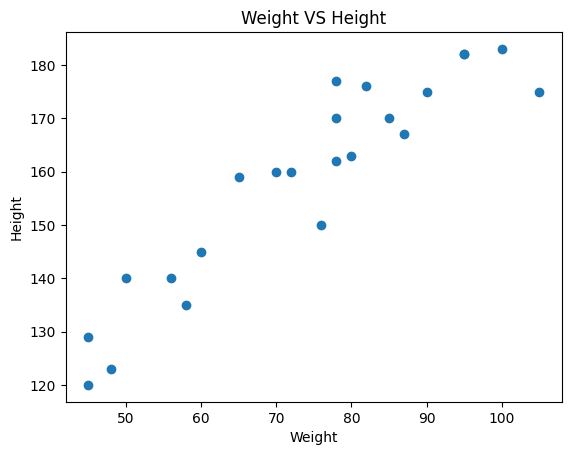

In [3]:
## scatter plot

plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight VS Height')
plt.show()

In [4]:
## correlation

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


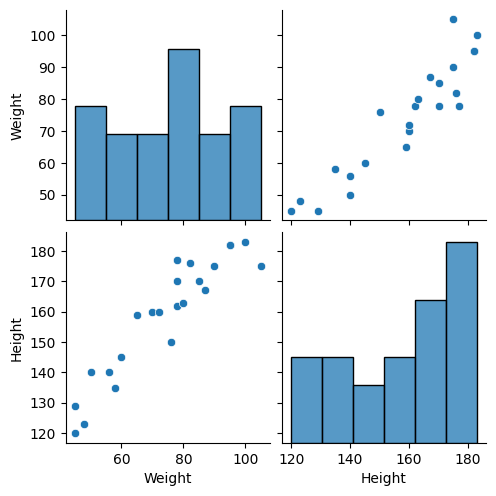

In [5]:
## pairplot

import seaborn as sns

sns.pairplot(df)

In [7]:
### independent and dependent feature

X = df[['Weight']]  ## independent feature should be a dataframe
y = df['Height']

## shape of features
print(f"shape of independent features: {X.shape} and shape of dependent feature {y.shape}")



shape of independent features: (23, 1) and shape of dependent feature (23,)


In [8]:
### train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=23)

print(f'Shape of X train: {X_train.shape},Shape of X test: {X_test.shape},Shape of y train: {y_train.shape},Shape of y test: {y_test.shape}')

Shape of X train: (17, 1),Shape of X test: (6, 1),Shape of y train: (17,),Shape of y test: (6,)


In [9]:
### Standardization

from sklearn.preprocessing import StandardScaler

#create instance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  ## we use fit_transform for train data

X_test = scaler.transform(X_test) 
'''
we use transform for test data 
as we don't want to set new mean and sd values
we use mean and sd values from train data
'''

"\nwe use transform for test data \nas we don't want to set new mean and sd values\nwe use mean and sd values from train data\n"

In [10]:
### apply linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()

## fit model to train data

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
## Parameters

print(f"slope: {model.coef_}, intercept: {model.intercept_}")

slope: [17.88454513], intercept: 161.41176470588235


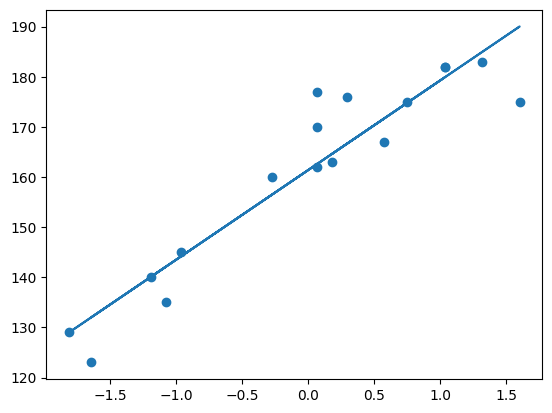

In [12]:
## plot best fit line

plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train))

In [ ]:
## prediction for test data

preds = model.predict(X_test)

array([160.51359683, 169.67490921, 134.04758328, 154.40605524,
       128.9579653 , 149.31643725])

In [17]:
### Performance metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

print(f'Mean squared error: {mse}, \nMean Absolute Error: {mae},\nRoot Mean Squared Error: {rmse},\nR2: {r2}')

Mean squared error: 58.56356912372126, 
Mean Absolute Error: 6.837762857014748,
Root Mean Squared Error: 7.652683785687297,
R2: 0.7777239337423336


In [18]:
## Adjusted R-square

adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"Adjusted R2 score: {adj_r2}")

Adjusted R2 score: 0.722154917177917


In [19]:
### OLS Linear regression

import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()
pred = model.predict(X_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1961
Date:                Fri, 10 Oct 2025   Prob (F-statistic):                       0.664
Time:                        13:51:48   Log-Likelihood:                         -110.56
No. Observations:                  17   AIC:                                      223.1
Df Residuals:                      16   BIC:                                      224.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
## prediction for new data point

model.predict(scaler.transform([[172]]))

d:\KNMaterial\my_python\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([96.8224975])